In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import shap

In [ ]:
data = [
    {"pokemon": "皮卡丘", "sp": 660, "lv": 10, "energy": 36, "bonus": 1.05},
    {"pokemon": "盆才怪", "sp": 359, "lv": 10, "energy": 41, "bonus": 1.05},
    {"pokemon": "青綿鳥", "sp": 325, "lv": 2, "energy": 27, "bonus": 1.05},
    {"pokemon": "小磁怪", "sp": 347, "lv": 8, "energy": 42, "bonus": 1.05},
    {"pokemon": "傑尼龜", "sp": 392, "lv": 6, "energy": 38, "bonus": 1.05},
    {"pokemon": "鬼斯", "sp": 310, "lv": 2, "energy": 30, "bonus": 1.05},
    {"pokemon": "地鼠", "sp": 351, "lv": 5, "energy": 35, "bonus": 1.05},
    {"pokemon": "猴怪", "sp": 352, "lv": 2, "energy": 30, "bonus": 1.05},
    {"pokemon": "喵喵", "sp": 306, "lv": 2, "energy": 61/2, "bonus": 1.05},
    {"pokemon": "皮卡丘", "sp": 610, "lv": 11, "energy": 39, "bonus": 1.10},
    {"pokemon": "青綿鳥", "sp": 332, "lv": 7, "energy": 33, "bonus": 1.10},
    {"pokemon": "小磁怪", "sp": 334, "lv": 4, "energy": 40, "bonus": 1.10},
    {"pokemon": "小磁怪", "sp": 333, "lv": 7, "energy": 43, "bonus": 1.10},
    {"pokemon": "幼基拉斯", "sp": 366, "lv": 7, "energy": 40, "bonus": 1.10},
    {"pokemon": "果然翁", "sp": 498, "lv": 7, "energy": 36, "bonus": 1.10},
    {"pokemon": "皮丘", "sp": 356, "lv": 7, "energy": 35, "bonus": 1.10},
    {"pokemon": "火球鼠", "sp": 442, "lv": 6, "energy": 36, "bonus": 1.10},
    {"pokemon": "卡蒂狗", "sp": 368, "lv": 2, "energy": 31, "bonus": 1.10},
    {"pokemon": "茸茸羊", "sp": 470, "lv": 8, "energy": 36, "bonus": 1.10},
    {"pokemon": "盆才怪", "sp": 281, "lv": 7, "energy": 40, "bonus": 1.10},
    {"pokemon": "隆隆石", "sp": 470, "lv": 9, "energy": 42, "bonus": 1.10},
    {"pokemon": "可達鴨", "sp": 347, "lv": 6, "energy": 40, "bonus": 1.10},
    {"pokemon": "戴魯比", "sp": 343, "lv": 2, "energy": 36, "bonus": 1.10},
    {"pokemon": "喇叭芽", "sp": 317, "lv": 3, "energy": 36, "bonus": 1.10},
    {"pokemon": "戴魯比", "sp": 417, "lv": 6, "energy": 80/2, "bonus": 1.10},
    {"pokemon": "利歐路", "sp": 308, "lv": 5, "energy": 69/2, "bonus": 1.10},
    {"pokemon": "猴怪", "sp": 355, "lv": 7, "energy": 73/2, "bonus": 1.10},
    {"pokemon": "傑尼龜", "sp": 483, "lv": 10, "energy": 88/2, "bonus": 1.10},
    {"pokemon": "小鋸鱷", "sp": 405, "lv": 6, "energy": 80/2, "bonus": 1.10},
    {"pokemon": "猴怪", "sp": 368, "lv": 4, "energy": 66/2, "bonus": 1.10},
    {"pokemon": "妙蛙種子", "sp": 380, "lv": 3, "energy": 32, "bonus": 1.00},
    {"pokemon": "妙蛙種子", "sp": 397, "lv": 7, "energy": 36, "bonus": 1.00},
    {"pokemon": "皮卡丘", "sp": 623, "lv": 12, "energy": 36, "bonus": 1.00},
    {"pokemon": "幼基", "sp": 375, "lv": 8, "energy": 37, "bonus": 1.00},
    {"pokemon": "嘟嘟", "sp": 353, "lv": 5, "energy": 56, "bonus": 1.00},
    {"pokemon": "嘟嘟", "sp": 378, "lv": 8, "energy": 62/2, "bonus": 1.00},
    {"pokemon": "呆呆獸", "sp": 361, "lv": 4, "energy": 68/2, "bonus": 1.00},
    {"pokemon": "可達鴨", "sp": 347, "lv": 6, "energy": 72/2, "bonus": 1.00},
    {"pokemon": "寶寶丁", "sp": 307, "lv": 8, "energy": 66/2, "bonus": 1.00},
    {"pokemon": "寶寶丁", "sp": 310, "lv": 9, "energy": 68/2, "bonus": 1.00},
    {"pokemon": "青綿鳥", "sp": 343, "lv": 8, "energy": 62/2, "bonus": 1.00},
    {"pokemon": "小火龍", "sp": 495, "lv": 10, "energy": 42, "bonus": 1.15},
    {"pokemon": "卡咪龜", "sp": 590, "lv": 10, "energy": 92/2, "bonus": 1.15},
    {"pokemon": "海豹球", "sp": 428, "lv": 10, "energy": 95/2, "bonus": 1.15}
]

In [16]:
data = [
    {'pokemon': '皮卡丘', 'lv': 10, 'sp': 660, 'energy': 36},
    {'pokemon': '盆才怪', 'lv': 10, 'sp': 359, 'energy': 41},
    {'pokemon': '青綿鳥', 'lv': 2, 'sp': 325, 'energy': 27},
    {'pokemon': '小磁怪', 'lv': 8, 'sp': 347, 'energy': 42},
    {'pokemon': '傑尼龜', 'lv': 6, 'sp': 392, 'energy': 38},
    {'pokemon': '鬼斯', 'lv': 2, 'sp': 310, 'energy': 30},
    {'pokemon': '地鼠', 'lv': 5, 'sp': 351, 'energy': 35},
    {'pokemon': '猴怪', 'lv': 2, 'sp': 352, 'energy': 30},
    {'pokemon': '皮卡丘', 'lv': 11, 'sp': 610, 'energy': 39},
    {'pokemon': '青綿鳥', 'lv': 7, 'sp': 332, 'energy': 33},
    {'pokemon': '戴魯比', 'lv': 6, 'sp': 417, 'energy': 80/2},
    {'pokemon': '利歐路', 'lv': 5, 'sp': 308, 'energy': 69/2},
    {'pokemon': '猴怪', 'lv': 7, 'sp': 355, 'energy': 73/2},
    {'pokemon': '小磁怪', 'lv': 4, 'sp': 334, 'energy': 40},
    {'pokemon': '小磁怪', 'lv': 7, 'sp': 333, 'energy': 43},
]
df = pd.DataFrame(data)
df

,pokemon,lv,sp,energy
0,皮卡丘,10,660,36.0
1,盆才怪,10,359,41.0
2,青綿鳥,2,325,27.0
3,小磁怪,8,347,42.0
4,傑尼龜,6,392,38.0
5,鬼斯,2,310,30.0
6,地鼠,5,351,35.0
7,猴怪,2,352,30.0
8,皮卡丘,11,610,39.0
9,青綿鳥,7,332,33.0


In [ ]:
features = ['lv', 'sp']
label = ['energy']
X = df[features]
y = df[label]

## DecisionTreeRegressor

In [17]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [50]:
new_df = pd.DataFrame([
        {'pokemon': '幼基拉斯', 'lv': 7, 'sp': 366},
        {'pokemon': '果然翁', 'lv': 7, 'sp': 498},
        {'pokemon': '皮丘', 'lv': 7, 'sp': 356},
        {'pokemon': '火球鼠', 'lv': 6, 'sp': 442},
    ])
predicted_energy = model.predict(new_df[['lv', 'sp']])
new_df['predict_energy'] = predicted_energy
new_df

,pokemon,lv,sp,predict_energy
0,幼基拉斯,7,366,41.0
1,果然翁,7,498,40.0
2,皮丘,7,356,36.5
3,火球鼠,6,442,40.0


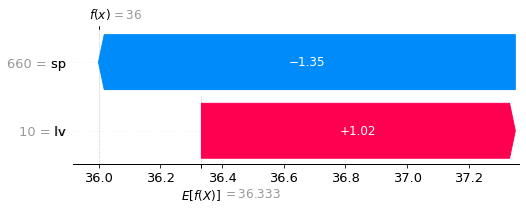

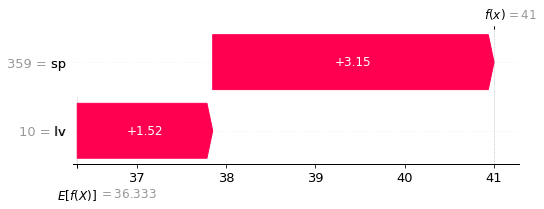

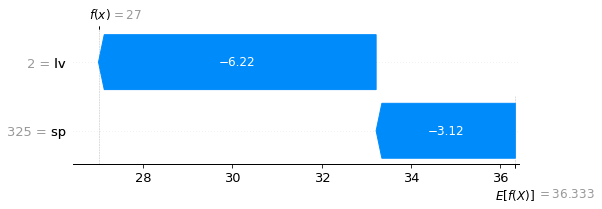

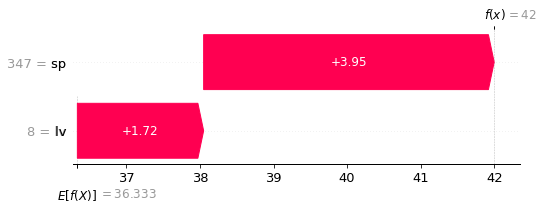

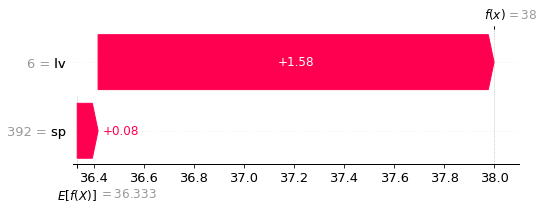

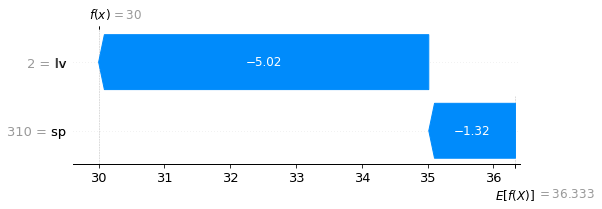

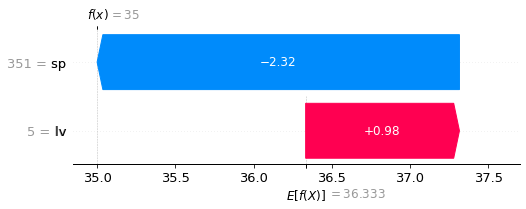

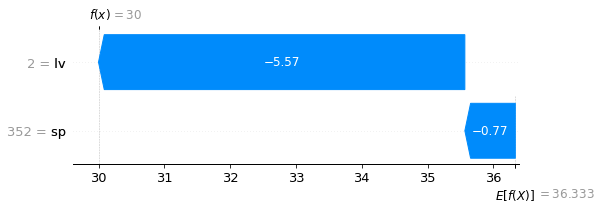

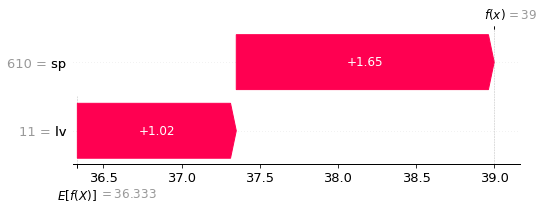

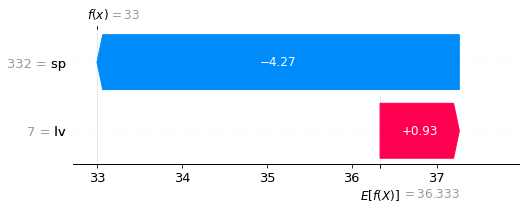

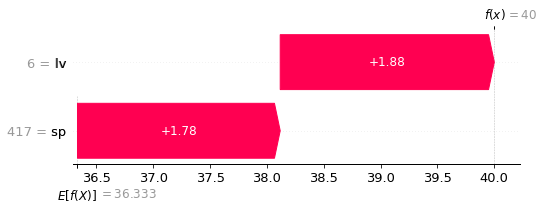

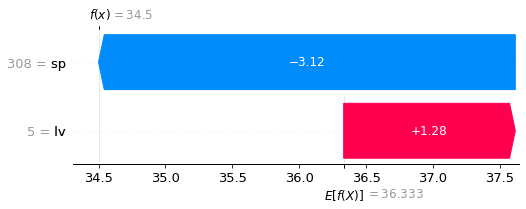

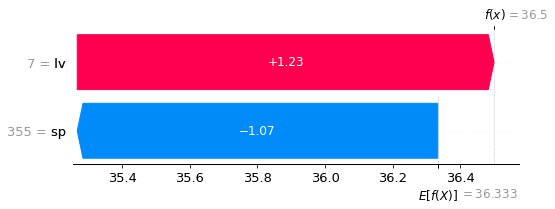

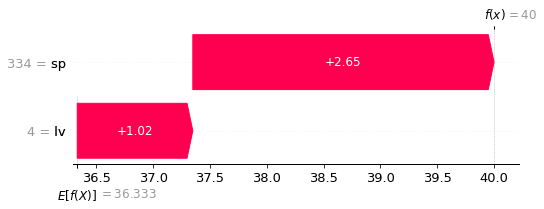

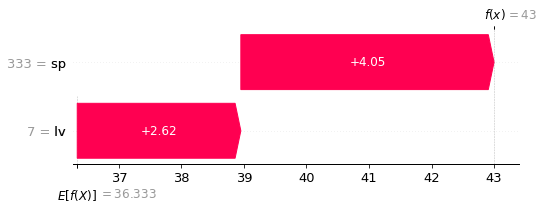

In [51]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
for val in shap_values:
    shap.plots.waterfall(val)

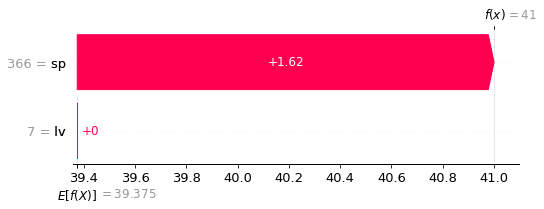

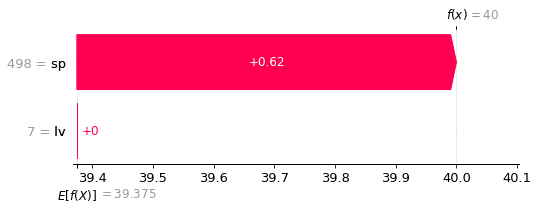

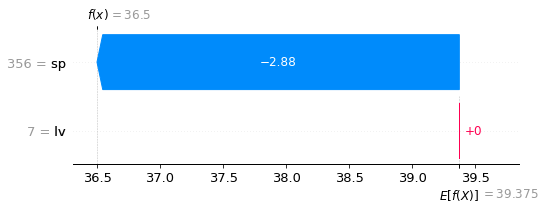

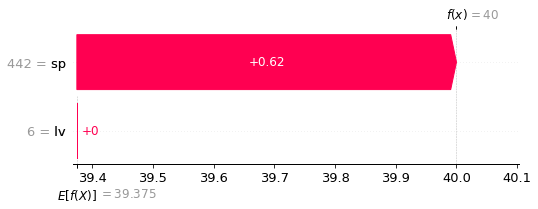

In [48]:

explainer = shap.Explainer(model, new_df[['lv', 'sp']])
shap_values = explainer(new_df[['lv', 'sp']])
for val in shap_values:
    shap.plots.waterfall(val)

## LinearRegression

In [56]:
model = LinearRegression()
model.fit(X, y)

predicted_energy = model.predict(new_df[['lv', 'sp']])
new_df['predict_energy'] = predicted_energy.astype(int)
new_df

,pokemon,lv,sp,predict_energy
0,幼基拉斯,7,366,38
1,果然翁,7,498,35
2,皮丘,7,356,38
3,火球鼠,6,442,35


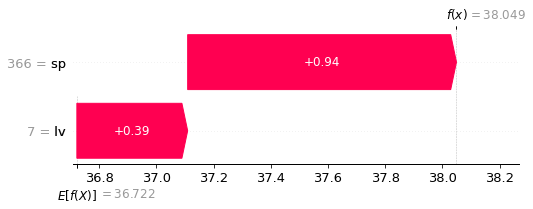

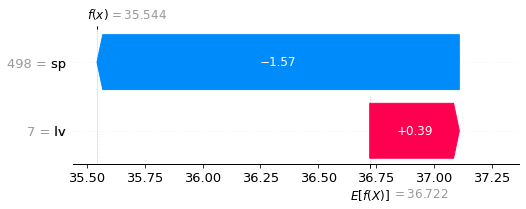

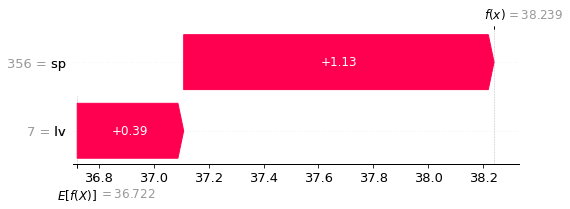

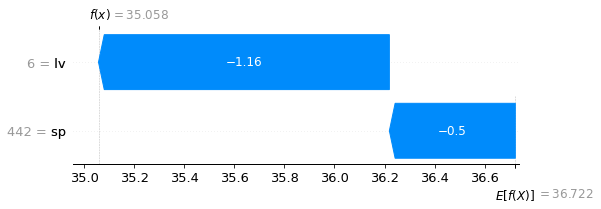

In [57]:
explainer = shap.Explainer(model, new_df[['lv', 'sp']])
shap_values = explainer(new_df[['lv', 'sp']])
for val in shap_values:
    shap.plots.waterfall(val)